<a href="https://colab.research.google.com/github/rjvmhn007/Credit-Card-Fraud-Detection/blob/master/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
data.shape

(284807, 31)

In [ ]:
 print (data.describe())

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


In [ ]:
## Sampling of data as data set is large

##data= data.sample(frac=0.1,random_state=1)
##data.shape

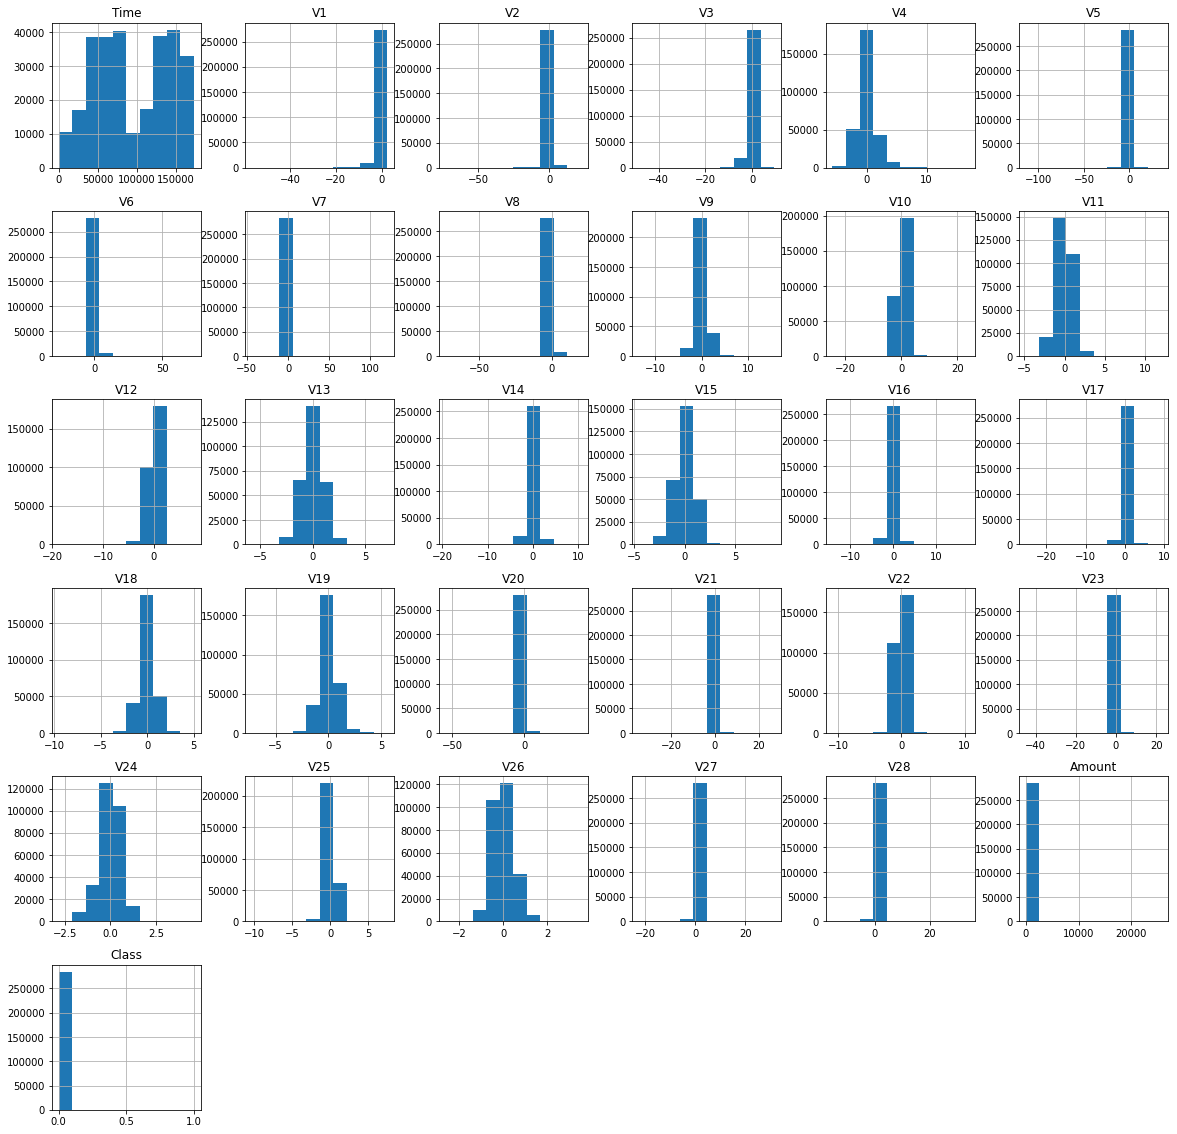

In [ ]:
##Plot hoistogram of parameter

data.hist(figsize=(20,20))
plt.show()

In [ ]:
## Determine the fraud transactions
fraud= data[data['Class']==1]
valid= data[data['Class']==0]

outlier_fraction= len(fraud)/float(len(valid))

print("Outlier Fraction",outlier_fraction)
print("Fraud case",format(len(fraud)))
print("Valid Cases",format(len(valid)))

Outlier Fraction 0.0017304750013189597
Fraud case 492
Valid Cases 284315


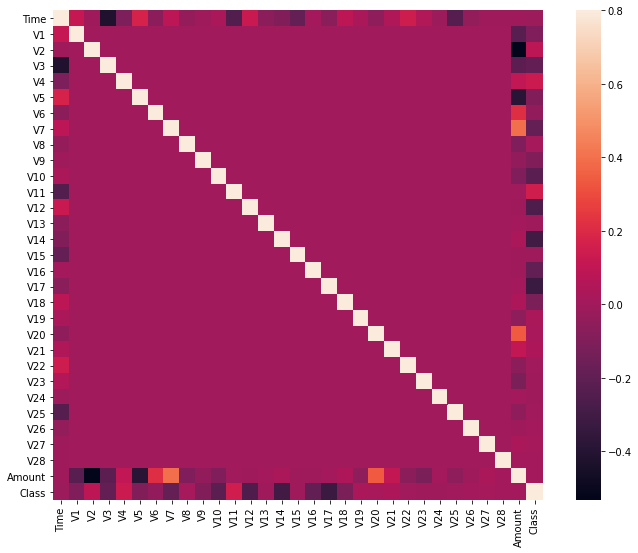

In [ ]:
##Corelation Matrix

corrmat= data.corr()
fig= plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8,square= True)
plt.show()

In [ ]:
## Get all the columns from the dataframe

columns= data.columns.to_list()

## Filter the columsn to remove the dat we do not want

columns= [c for c in columns if c not in ["Class"]]

target= "Class"
X= data[columns]
Y= data[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [ ]:
from sklearn.metrics import  classification_report,accuracy_score
from sklearn.ensemble import  IsolationForest
from sklearn.neighbors import  LocalOutlierFactor 

## determine random state
state=1

#define outlier detection
classifiers= {
    "Isolation Forest": IsolationForest (max_samples=len(X),contamination=outlier_fraction,random_state= state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors = 20, contamination = outlier_fraction)
}

In [ ]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 645
0.997735308472053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      0.35      0.35       492

    accuracy                           1.00    284807
   macro avg       0.67      0.67      0.67    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
0.9967170750718908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



<Figure size 648x504 with 0 Axes>